In [1]:
include("../src/Conduction.jl");
using Plots, LaTeXStrings, QuadGK, Roots;

semiconductor = Conduction.Semiconductor(
4.34e7, # decay constant of the assumed hydrogen-like localized state wave functions (cm^-1)
0.1 * 1.6e-19, # Mode effect of the phonons (J)
3e21, # intrinsic semiconductor's density (cm^-3)
0, # Doping states' density (cm^-3)
0.29 * 1.6e-19, # Energy to a vacant target site (J)
1e13, # Base electron jump rate
-0.5, # Fermi level (J)
0.1, # Intrinsic semiconductor's gaussian width (J)
0.1, # Doping states' gaussian width (J)
);

F = -5e4; # Field (V.cm^-1)
T = 300;

In [2]:
range = -1:0.1:0;
res = [];

for i in range
    semiconductor.Uf = i * Conduction.ev;
    append!(res, Conduction.overallEin(semiconductor, T, F, 20))
end

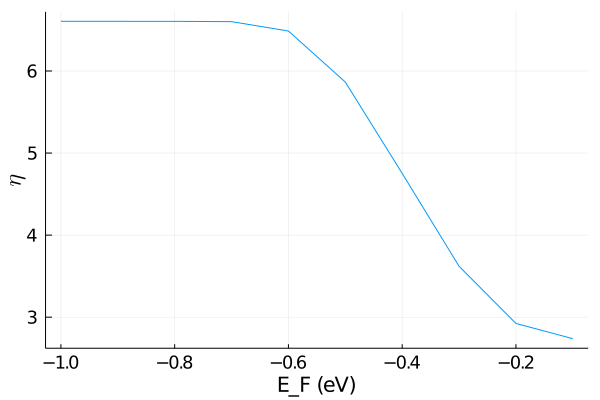

In [6]:
plot(range[1:end-1], res[1:end-1] ./ (Conduction.k * T / Conduction.q), xlabel="E_F (eV)", ylabel=L"\eta", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)

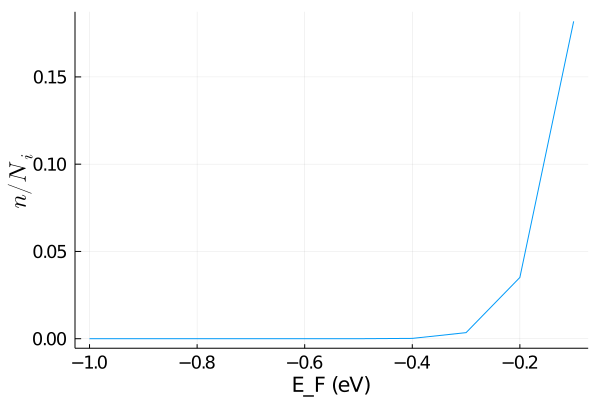

In [22]:
p() = quadgk(
    r -> Conduction.DOS(semiconductor, r, T) * Conduction.F(semiconductor, r, T) * Conduction.k * T,
    -Inf,
    Inf
)[1];

res_charge = [];
for i in range
    semiconductor.Uf = i * Conduction.ev;
    append!(res_charge, p() / semiconductor.Ni)
end

plot(range[1:end-1], res_charge[1:end-1], xlabel="E_F (eV)", ylabel=L"n / N_i", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)


In [ ]:
range = -1:0.1:0;
res_d = [];

for i in range
    semiconductor.Uf = i * Conduction.ev;
    append!(res, Conduction.D(semiconductor, T, F, 15))
end

LoadError: [91mRoot function starting point does not lead to a convergence[39m

In [ ]:
range = -1:0.1:0;
res_mu = [];

for i in range
    semiconductor.Uf = i * Conduction.ev;
    append!(res, Conduction.electronMobility(semiconductor, T, F, 15))
end